In [211]:
import pandas as pd
import matplotlib.pyplot as plt

data_2020 = pd.read_excel(r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\University Data\Statistics-SFTS-qualitative-data-in-2020-Report.xlsx")
data_2021 = pd.read_excel(r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\University Data\Statistics-SFTS-ENDQs_qualitative-data-2021-Report.xlsx")
data_2022 = pd.read_excel(r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\University Data\Statistics-SFTS-Qualitative-ENDQs-2022-Report.xlsx")
data_2023 = pd.read_excel(r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\University Data\Statistics-SFTS-Qualtitative-ENDQ1&2_2023-Report.xlsx")

In [212]:
# Concatenate by rows
result_df = pd.concat([data_2020, data_2021, data_2022, data_2023], ignore_index=True)
# Assuming result_df is your concatenated DataFrame
result = result_df.iloc[:, :-3]
data = result.iloc[:, :8].join(result.iloc[:,-1], how='inner')

In [213]:
data

,Area,Course Code,Course,Semester,Year,Course Title,Course UniqueID,QuestionKey,Comments
0,Statistics,stk210_s1_2020,stk210,1.0,2020,STK 210 S1 2020,stk210_s1_2020,3132-0,-||all online and class activities||All past-p...
1,Statistics,stk210_s1_2020,stk210,1.0,2020,STK 210 S1 2020,stk210_s1_2020,4405-0,Alot easier to do.||better||Better than the pi...
2,Statistics,bme210_s1_2020,bme210,1.0,2020,BME 210 S1 2020,bme210_s1_2020,5076-0,/||Can finish chapters in my own time||Can lie...
3,Statistics,bme410_s1_2020,bme410,1.0,2020,BME 410 S1 2020,bme410_s1_2020,5076-0,Completed this module before the lockdown was ...
4,Statistics,stk110_s1_2020,stk110,1.0,2020,STK 110 S1 2020,stk110_s1_2020,5076-0,||A lot of this module was already online befo...
...,...,...,...,...,...,...,...,...,...
233,Statistics,wst133_s1_2023,wst133,1.0,2023,WST 133 S1 2023,wst133_s1_2023,33594-0,A lack of sufficient resources to study from.|...
234,Statistics,wst153_s1_2023,wst153,1.0,2023,WST 153 S1 2023,wst153_s1_2023,33594-0,I understand that the lecture has to stick to ...
235,Statistics,wst211_s1_2023,wst211,1.0,2023,WST 211 S1 2023,wst211_s1_2023,33594-0,Can't see anything during discussion class (th...
236,Statistics,wst212_s1_2023,wst212,1.0,2023,WST 212 S1 2023,wst212_s1_2023,33594-0,.||A lack of extra exercises and memo's aside ...


In [214]:
import pandas as pd

# Assuming 'data' is your DataFrame
new_data = []

for index, row in data.iterrows():
    course_code = row['Course']
    semester = row['Semester']
    year = row['Year']
    question_key = row['QuestionKey']
    
    # Check if 'Comments' is not NaN
    if pd.notna(row['Comments']):
        comments = row['Comments'].split('||')

        for comment in comments:
            new_data.append({'Course': course_code,'Semester':semester,'Year':year,'QuestionKey': question_key ,'Comments': comment.strip()})


In [215]:
new_df = pd.DataFrame(new_data)

In [216]:
new_df.to_excel('s.xlsx')

In [217]:
import re
from collections import Counter
import pandas as pd

def find_capital_words(text):
    if pd.isna(text) or not isinstance(text, str):
        return []  # Return an empty list for non-string or missing values
    
    pattern = r'\b[A-Z][a-z]*\b'
    capital_words = re.findall(pattern, text)
    return capital_words

# Apply the function to the 'Comments' column
new_df['Capitalized_Words'] = new_df['Comments'].apply(find_capital_words)

# Flatten the lists and count the occurrences
all_capital_words = [word for words_list in new_df['Capitalized_Words'] for word in words_list]
word_counts = Counter(all_capital_words)




In [218]:
import re
from collections import Counter
import pandas as pd

def find_capital_words(text):
    if pd.isna(text) or not isinstance(text, str):
        return []  # Return an empty list for non-string or missing values
    
    pattern = r'\b[A-Z][a-z]*\b'
    capital_words = re.findall(pattern, text)
    return capital_words

# Apply the function to the 'Comments' column
new_df['Capitalized_Words'] = new_df['Comments'].apply(find_capital_words)

# Flatten the lists and count the occurrences
all_capital_words = [word for words_list in new_df['Capitalized_Words'] for word in words_list]
word_counts = Counter(all_capital_words)

# Create a DataFrame from the Counter
summary_df = pd.DataFrame(list(word_counts.items()), columns=['Word', 'Count'])

# Export the summary to an Excel file
summary_df.to_excel('capitalized_words_summary.xlsx', index=False)


In [219]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer, ToktokTokenizer
import re
from nltk import pos_tag

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from string import punctuation
from nltk.stem import WordNetLemmatizer
import os
from spellchecker import SpellChecker
from sklearn.preprocessing import LabelEncoder

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

s = new_df['Comments']
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
tokenizer = word_tokenize
custom_spellchecker = SpellChecker()

# Contractions dictionary
contractions_dict = {
"tuts":"tutorial",
"pracs":"practical",
"labs":"laboratory",
"imroove":"improve",
"preparfed":"prepared",
"difficultto":"difficult to",
"understadable":"understandable",
"verry":"very",
"mpdules":"module",
"challanging":"challenging",
"questionair":"questionnaire",
"affraid":"afraid",
"interacte":"interact",
"semeter":"semester",
"ive":"i have",
"werent":"were not",
"preform":"perform",
"toget":"to get",
"hjave":"have",
"turioals":"tutorial",
"detial":"detail",
"problemes":"problem",
"lucturer":"lecturer",
"lactures":"lecture",
"sloving":"solving",
"begining":"beginning",
"activly":"actively",
"benefeicial":"beneficial",
"struggeling":"struggl",
"acessable":"accessible",
"undersanding":"understand",
"absolutley":"absolutely",
"connivence":"convenience",
"acces":"access",
"inn":":in",
"asses":"assess",
"imformative":"informative",
"leraning":"learn",
"schdules":"schedule",
"convinient":"convenient",
"exmaples":"example",
"explaing":"explaining",
"blckboard":"blackboard",
"collabarate":"collaborate",
"treffic":"traffic",
"materals":"material",
"reallu":"really",
"derivati":"derivative",
"subjetcs":"subject",
"blackbord":"blackboard",
"resorces":"resource",
"thurday":"thursday",
"reaources":"resource",
"traveltime":"travel time",
"comute":"commute",
"enoy":"enjoy",
"expatiation":"explanation",
"hvaing":"having",
"pase":"phase",
"lecturere":"lecturer",
"untill":"until",
"wasy":"easy",
"progam":"program",
"atrending":"attending",
"jy":"you",
"querry":"query",
"mnay":"may",
"wprk":"work",
"feedbac":"feedback",
"addedd":"added",
"somethigs":"something",
"empithy":"empathy",
"doin":"doing",
"communiation":"communication",
"diffuclt":"difficult",
"ons":"us",
"unfortunatly":"unfortunately",
"unnecassary":"unnecessary",
"expeienced":"experience",
"adresssed":"addressed",
"loadshadding":"loadshedding",
"inish":"finish",
"lotttttt":"lot",
"manyassignments":"many assignment",
"conducti":"conduct",
"upconect":"upconnect",
"loadsehedding":"loadshedding",
"asistance":"assistance",
"statisitics":"statistics",
"ohysical":"physical",
"noy":"not",
"slowely":"slowly",
"sceduling":"schedule",
"snd":"and",
"explanatius":"explanation",
"classess":"class",
"doingg":"doing",
"cusultation":"consultation",
"explanation":"explanation",
"questius":"question",
"sessius":"session",
"cusultatius":"consultation",
"activities":"activity",
"papers":"paper",
"homeworks":"homework",
"consulations":"consultation",
"assessments":"assessment",
"treffic":"traffic",
"fir":"for",
"kinda":"kind of",
"struggl":"struggle",
"alot":"a lot"
}

sigular_dict = {
    "classes":"class",
    "tests":"test",
    "examples":"example",
    "methods":"method",
    "lectures":"lecture",
    "lecturers":"lecturer",
    "homeworks":"homework",
    "helps":"help",
    "activities":"activity",
    "concepts":"concept",
    "worked":"work",
    "slides":"slide",
    "uploaded":"upload",
    "exercises":"exercise",
    "questions":"question",
    "answers":"answer",
    "conclusions":"conclusion",
    "datasets":"dataset",
    "grades":"grade",
    "tips":"tip",
    "tricks":"trick",
    "demands":"demand",
    "pretests":"pretest",
    "voices":"voice",
    "dislikes":"dislike",
    "concerns":"concern",
    "reads":"read",
    "benefited":"benefit",
    "tasks":"task",
    "papers":"paper",
    "explanations":"explanation",
    "notes":"note",
    "dished":"dish",
    "videos":"video",
    "uploaded":"upload",
    "sheets":"sheet",
    "topics":"topic",
    "books":"book",
    "needed":"need",
    "exams":"exam",
    "cramming":"cram",
    "summaries":"summary",
    "proofs":"proof",
    "laptops":"laptop",
    "devices":"device",
    "trees":"tree",
    "tutors":"tutor",
    "assignments":"assignment",
    "worksheets":"worksheet",
    "aspects":"aspect",
    "students":"student",
    "documents":"document",
    "practicals":"practical",
    "difficulties":"difficult",
    "modules":"module",
    "probabilities":"probability",
    "matrices":"matrix",
    "derivatives":"derivative",
    "attempts":"attempt",
    "mistakes":"mistake",
    "tested":"test",
    "dealt":"deal",
    "deals":"deal",
    "marks":"mark",
    "skips":"skip",
    "chapters":"chapter",
    "years":"year",
    "submissions":"submission",
    "skills":"skill",
    "provided":"provide",
    "sildes":"slide",
    "works":"work",
    "problems":"problem",
    "times":"time",
    "forms":"form",
    "connections":"connection",
    "consultations":"consultation",
    "sessions":"session",
    "makes":"make",
    "paced":"pace",
    "forces":"force",
    "weeks":"week",
    "recorded":"record",
    "studies":"study",
    "cases":"case",
    "struggl":"struggle",
    "prac":"practical",
    "saves":"save",
    "pracs":"practical",
    "practiced":"practise",
    "practised":"practise",
    "notational":"notation",
    "oher":"other",
    "oay":"okay",
    "assessed":"assess",
    "comments":"comment",
    "feels":"feel",
    "miised":"miss",
    "communicates":"communicate",
    "presentations":"presentation",
    "pausing":"pause",
    "moderators":"moderator",
    "assigments":"assignment",
    "communicating":"communicate",
    "tutorials":"tutorial"
}
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

def correct_spelling(text, corrections_dict=contractions_dict):
    words = text.split()
    corrected_words = [corrections_dict.get(word, word) for word in words]
    corrected_text = ' '.join(corrected_words)
    return corrected_text

def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, ' ', text)
    return text

def remove_stopwords(text, is_lower_case=False):
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

def singularize_words(text, singular_dict):
    words = text.split()
    singularized_words = [singular_dict.get(word, word) for word in words]
    singularized_text = ' '.join(singularized_words)
    return singularized_text


def preprocess_text(text):
    text = text.lower()
    text = correct_spelling(text)
    text = remove_special_characters(text)
    #remove stop words
    additional_words = ['da','terminator','ms','pace','ta','ac','za','loqd','dis','trst','cbts','itsi','miebooks','ya','ms','neethlings','neethling','dr','wah','kleyn','e','na','ie','isnt','miss ','ane','cap','stk','sfts','burger','kraamwinkel','inger','fletcher','prof','pretoria','university','lindo','christene','n','nothing','none','bcom','niks','comment','non','applicable','u','z','nagar','bme','wst','stc','acc','sci','up','llb','stem','sir','ntn','mrs','le','coster','madam','usualky','thou','couldve','muslim','cultures','ramadan','preparfed','nina','masters','difficultto','tukstube','sssignments','actuary','phd','memose','trecky','wendy','ozark','thuto','najmeh','pedagogy','understadable','understandng','verry','liberating','calcute','undesrtandable','ams','kraamwinkle','mr','magagula','zl','coz','b','retief',  'makgai','cleo','fabris','rotelli','tuks','sir','hatfield','swaziland','eswatini','fletcher','google','wikipedeia','qwaqwa','lusaka','south','africa','merensky','zoom','res','wi','fi','minister','residence','swanepoel','universities','judy','paul','van','staden','ehlers','ehler','doctor','pearson','christine','khan','york','mars','hackettstown','bayer','ferreria',
                        'mam','crafford','merwe','mister','priyanka','didi','salomi','sirs','lindi','mahloromela','otieno','arnold','stander','fereirra','ferrreira','luke','farreira','morden','cambridge','rene','seite','mrs','michelle','klerk','numbas','divan','mamelodi','maribe','iketle','maharela','reyneke','coetser','limpopo','ratief','rian','waal','de','botes','jocelyn',
                        'mazarura','ansie','smit','kabelo','derks','iena','dirks','ferreira','johan','renate','thiede','gao','skhosana','coester','cloester','arminn','brenda','malela','oduol','chimamanda','ngozi','adichie','tristan','lebogang','evernice','fletchers','macdoul','alexander','kelbrick','loina','linda']
    stopwords_list = "you'll,mustn't,it's,mustn,hasn't,didn't,needn't,should've,shouldn't,isn't,you're,that'll,wasn't,couldn't,shan,you've,shan't,doesn't,ma,mightn,wouldn't,won't,haven't,you'd,hadn't,y,weren't,mightn't,needn,don't,o,aren't,she's,u,a,s,able,about,above,according,accordingly,across,actually,after,afterwards,again,against,ain,t,all,allow,allows,almost,alone,along,already,also,although,always,am,among,amongst,an,and,another,any,anybody,anyhow,anyone,anything,anyway,anyways,anywhere,apart,appear,appreciate,appropriate,are,aren,t,around,as,aside,ask,asking,associated,at,available,away,awfully,be,became,because,become,becomes,becoming,been,before,beforehand,behind,being,believe,below,beside,besides,best,better,between,beyond,both,brief,but,by,c,mon,c,s,came,can,can,t,cannot,cant,cause,causes,certain,certainly,changes,clearly,co,com,come,comes,concerning,consequently,consider,considering,contain,containing,contains,corresponding,could,couldn,t,course,currently,definitely,described,despite,did,didn,t,different,do,does,doesn,t,doing,don,t,done,down,downwards,during,each,edu,eg,eight,either,else,elsewhere,enough,entirely,especially,et,etc,even,ever,every,everybody,everyone,everything,everywhere,ex,exactly,example,except,far,few,fifth,first,five,followed,following,follows,for,former,formerly,forth,four,from,further,furthermore,get,gets,getting,given,gives,go,goes,going,gone,got,gotten,greetings,had,hadn,t,happens,hardly,has,hasn,t,have,haven,t,having,he,he,s,hello,help,hence,her,here,here,s,hereafter,hereby,herein,hereupon,hers,herself,hi,him,himself,his,hither,http,hopefully,how,howbeit,however,i,d,i,ll,i,m,i,ve,ie,if,ignored,immediate,in,inasmuch,inc,indeed,indicate,indicated,indicates,inner,insofar,instead,into,inward,is,isn,t,it,it,d,it,ll,it,s,its,itself,just,keep,keeps,kept,know,knows,known,last,lately,later,latter,latterly,least,less,lest,let,let,s,like,liked,likely,little,look,looking,looks,ltd,mainly,many,may,maybe,me,mean,meanwhile,merely,might,more,moreover,most,mostly,much,must,my,myself,name,namely,nd,near,nearly,necessary,need,needs,neither,never,nevertheless,new,next,nine,no,nobody,non,none,noone,nor,normally,not,nothing,novel,now,nowhere,obviously,of,off,often,oh,ok,okay,old,on,once,one,ones,only,onto,or,other,others,otherwise,ought,our,ours,ourselves,out,outside,over,overall,own,particular,particularly,per,perhaps,placed,please,plus,possible,presumably,probably,provides,proftimnoakes,que,quite,qv,rather,rd,re,really,reasonably,regarding,regardless,regards,relatively,respectively,right,said,same,saw,say,saying,says,second,secondly,see,seeing,seem,seemed,seeming,seems,seen,self,selves,sensible,sent,serious,seriously,seven,several,shall,she,should,shouldn,t,since,six,so,some,somebody,somehow,someone,something,sometime,sometimes,somewhat,somewhere,soon,sorry,specified,specify,specifying,still,sub,such,sup,sure,t,s,take,taken,tell,tends,th,than,thank,thanks,thanx,that,that,s,thats,the,their,theirs,them,themselves,then,thence,there,there,s,thereafter,thereby,therefore,therein,theres,thereupon,these,they,they,d,they,ll,they,re,rt,they,ve,think,third,this,thorough,thoroughly,those,though,three,through,throughout,thru,thus,to,together,too,took,toward,towards,tried,tries,truly,try,trying,twice,two,un,under,unfortunately,unless,unlikely,until,unto,up,upon,us,use,used,useful,uses,using,usually,value,various,very,via,viz,vs,want,wants,was,wasn,t,way,we,we,d,we,ll,we,re,we,ve,welcome,well,went,were,weren,t,what,what,s,whatever,when,whence,whenever,where,where,s,whereafter,whereas,whereby,wherein,whereupon,wherever,whether,which,while,whither,who,who,s,whoever,whole,whom,whose,why,will,willing,wish,with,within,without,won,t,wonder,would,would,wouldn,t,yes,yet,you,you,d,you,ll,you,re,you,ve,your,yours,yourself,yourselves,zero".split(',')

    text = " ".join([word for word in str(text).split() if word not in stopwords_list])
    text = " ".join([word for word in str(text).split() if word not in additional_words])
    text = singularize_words(text,sigular_dict)
    return text
s['clean_text'] = s.apply(preprocess_text)
d = s['clean_text']

C:\Users\jduto\AppData\Local\Temp\ipykernel_5508\3181165302.py:302: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['clean_text'] = s.apply(preprocess_text)


In [220]:
import pandas as pd
from collections import Counter

# Assuming 'd' is your preprocessed text column
word_counts = Counter(' '.join(d).split())

# Create a DataFrame from the word counts
df = pd.DataFrame(list(word_counts.items()), columns=['Word', 'Count'])

# Save the DataFrame to an Excel file
df.to_excel('word_counts.xlsx', index=False)


In [221]:
# Specify the file path where you want to save the text file
output_file_path = "dataset.txt"

# Open the file in write mode and write each processed document on a new line
with open(output_file_path, "w", encoding="utf-8") as output_file:
    for document in d:
        if document.strip():  # Check if the document has content
            output_file.write(document + "\n")  # Write the document to the file with a newline character



In [222]:
#java -jar jar/STTM.jar -model BTM -corpus dataset/data.txt -ntopics 200 -name btm

In [223]:
# Specify the file path where you want to save the text file
output_file_path = "dataset.txt"

# Open the file in write mode and write each processed document on a new line
with open(output_file_path, "w", encoding="utf-8") as output_file:
    for document in d:
        # Remove the check for non-empty content
        output_file.write(str(document) + "\n")  # Write the document to the file with a newline character


Dataset:

50 topics:
Coherence score: [1.108995497212707,1.149489500713558,1.1082496094725887,1.128880613192234,1.1582425111764811,1.140906173306414, 1.1628879822556242,1.146466459431846,1.1660565205213715,1.14479414819964]

100 topics:
Coherence score: [1.2139654407840574,1.1488427772048972,1.188818195624534,1.2152926336741332,1.181692547820417,1.2029138298733582,1.2104569095851734,1.169518106935836,1.232384322638127,1.1530367436748115]

110 topics:
Coherence score: [1.1974135543414266, 1.2361009358972628,1.2041453294502809, 1.1670613805601109,1.1569998775724766,1.1937827366709617,1.2167494179344596, 1.163011310909896, 1.2363892585905716,1.151150542671881]




Data_set:
50 topics:
Coherence score: [1.027372637673008,1.0479992226326638,1.2096494581962858,1.0903574141893613,1.0279488946064566,1.069162590997054,1.1109172661053464,1.0730898852349129,1.0844228496918569,0.9928458661247062]

100 topics:
Coherence score: [1.142871190082546,1.1226817158079148,1.0920394435665075,1.0879620292244374,1.1143888051561215,1.1436205755502455,1.0374828707475323,1.0877520960155629,1.1248882257236925,1.0923747487021045]

150 topics:
Coherence score: [1.1921596205441318,1.129507536928258,1.1204129208195397,1.1996905431786735,1.1731137465634758,1.1321303747648983,1.1959027731306129,1.1584180855261599,1.1504996823542415,1.1466239653657997]

200 topics:
Coherence score:
[1.2621276343338461,1.245272373173564,1.2452359763799488,1.214937281344563,1.2835940115006743,1.2649437684096718,1.2478993716130715,1.2572921564326762,1.2638696691257056,1.2132096622461799]

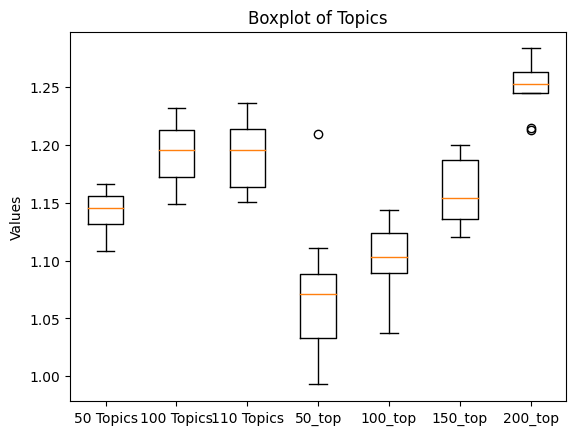

In [224]:
topics_50 = [1.108995497212707,1.149489500713558,1.1082496094725887,1.128880613192234,1.1582425111764811,1.140906173306414, 1.1628879822556242,1.146466459431846,1.1660565205213715,1.14479414819964]
topics_100 = [1.2139654407840574,1.1488427772048972,1.188818195624534,1.2152926336741332,1.181692547820417,1.2029138298733582,1.2104569095851734,1.169518106935836,1.232384322638127,1.1530367436748115]
topics_110 = [1.1974135543414266, 1.2361009358972628,1.2041453294502809, 1.1670613805601109,1.1569998775724766,1.1937827366709617,1.2167494179344596, 1.163011310909896, 1.2363892585905716,1.151150542671881]

top_50 = [1.027372637673008,1.0479992226326638,1.2096494581962858,1.0903574141893613,1.0279488946064566,1.069162590997054,1.1109172661053464,1.0730898852349129,1.0844228496918569,0.9928458661247062]
top_100 = [1.142871190082546,1.1226817158079148,1.0920394435665075,1.0879620292244374,1.1143888051561215,1.1436205755502455,1.0374828707475323,1.0877520960155629,1.1248882257236925,1.0923747487021045]
top_150 = [1.1921596205441318,1.129507536928258,1.1204129208195397,1.1996905431786735,1.1731137465634758,1.1321303747648983,1.1959027731306129,1.1584180855261599,1.1504996823542415,1.1466239653657997]
top_200 = [1.2621276343338461,1.245272373173564,1.2452359763799488,1.214937281344563,1.2835940115006743,1.2649437684096718,1.2478993716130715,1.2572921564326762,1.2638696691257056,1.2132096622461799]

plt.boxplot([topics_50, topics_100, topics_110,top_50,top_100,top_150,top_200], labels=['50 Topics', '100 Topics', '110 Topics','50_top','100_top','150_top','200_top'])
plt.title('Boxplot of Topics')
plt.ylabel('Values')
plt.show()

In [225]:
# Load top words
file_path = r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\University Data\STTM-master\results\btm__.topWords"
# Read the TXT file into a DataFrame
df = pd.read_csv(file_path, delimiter='\t',header=None)  # Change '\t' to the actual delimiter used in your file


In [226]:
# Specify the path to your text file
file_path = r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\University Data\STTM-master\results\btm__.vocabulary"

# Open the file in read mode
with open(file_path, "r", encoding="utf-8") as file:
    file_contents = file.read()
dtt = r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\University Data\STTM-master\results\btm__.theta"
with open(dtt, "r", encoding="utf-8") as file:
    theta_contents = file.readlines()
matrix = []

for element in theta_contents:
    # Split the element into individual values
    element_values = element.split()
    # Convert values to floats and append as a row to the matrix
    matrix.append([float(value) for value in element_values])

# Convert the matrix to a NumPy array for further manipulation if needed
matrix_array = np.array(matrix, dtype=float)




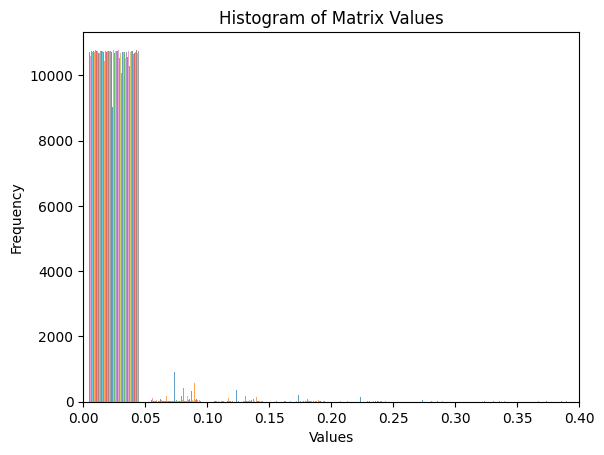

In [227]:
import matplotlib.pyplot as plt


# Create a histogram with 20 bins
plt.hist(matrix_array, bins=20, alpha=0.7)

# Set labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Matrix Values')
plt.xlim(0, 0.4)  # Specify the x-axis limits (min, max)
#plt.ylim(0, 50)  # Specify the y-axis limits (min, max)

# Show the histogram
plt.show()

In [228]:
import numpy as np

# Assuming matrix_array is already defined

# Target threshold for cumulative probabilities
target_threshold = 0.8

# List to store selected indices for each row
all_selected_indices = []

for row_index in range(matrix_array.shape[0]):
    # Select the row for which you want to find the indices
    arr = matrix_array[row_index]

    # Sort the indices based on probabilities
    sorted_indices = np.argsort(arr)

    # Find the indices whose probabilities add up to the target threshold
    cumulative_sum = 0
    selected_indices = []

    for index in sorted_indices[::-1]:
        cumulative_sum += arr[index]
        selected_indices.append(index)

        if cumulative_sum >= target_threshold:
            break

    all_selected_indices.append(selected_indices)

# Convert the list of lists to a NumPy array if needed
all_selected_indices_array = np.array(all_selected_indices, dtype=object)




In [229]:
import numpy as np

def group_sentences_by_topics(all_selected_indices_array):
    grouped_sentences = {}

    for doc_index, topic_indices in enumerate(all_selected_indices_array):
        for topic_index in topic_indices:
            if topic_index not in grouped_sentences:
                grouped_sentences[topic_index] = []
            grouped_sentences[topic_index].append(doc_index)

    return grouped_sentences

# Assuming all_selected_indices_array is already defined
grouped_sentences = group_sentences_by_topics(all_selected_indices_array)


In [230]:
new_df['processed comments'] = d
# Assuming 'new_df' is your DataFrame, and 'processed comments' is the column you're checking
new_df = new_df[new_df['processed comments'].str.strip() != '']


In [231]:
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Define your stop words
stop_words = set(stopwords.words('english'))

def generate_one_word_summary_from_text(text):
    sentences = sent_tokenize(text)
    
    # Preprocess the sentences
    preprocessed_sentences = []
    for sentence in sentences:
        words = word_tokenize(sentence.lower())
        tagged_words = pos_tag(words)  # Perform POS tagging
        nouns = [word for word, pos in tagged_words if pos.startswith('N')]  # Retain only nouns
        filtered_words = [word for word in nouns if word.isalnum() and word not in stop_words]
        preprocessed_sentences.append(filtered_words)
    
    # Calculate word frequencies
    word_frequencies = {}
    for sentence in preprocessed_sentences:
        for word in sentence:
            if word not in word_frequencies:
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1
    
    # Check if word_frequencies dictionary is empty
    if not word_frequencies:
        return None
    
    # Sort the word frequencies and select the most frequent word
    top_word = max(word_frequencies, key=word_frequencies.get)
    
    return top_word




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jduto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jduto\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jduto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [232]:
# Assuming grouped_rows is already defined
# Assuming repeated_ids_df['Sentences'] contains the sentences

# Function to get a one-word summary for each topic number
def get_topic_summaries(grouped_rows, sentences_column='processed comments'):
    # Initialize a dictionary to store topic summaries
    topic_summaries = {}

    # Iterate through each topic
    for topic_id, sentence_ids in grouped_rows.items():
        # Combine sentences into one text
        sentences = [new_df[sentences_column].iloc[sentence_id] for sentence_id in sentence_ids]
        text = ". ".join(sentences)
        
        # Generate one-word summary for the topic
        summary = generate_one_word_summary_from_text(text)
        
        # Store the summary for the topic
        topic_summaries[topic_id] = summary
    
    return topic_summaries

# Call the function with the existing grouped_rows
topic_summaries = get_topic_summaries(grouped_sentences)



In [233]:
# Get summaries for each sublist
topic_summaries_for_documents = []

for sublist in all_selected_indices:
    # Get summaries for each topic in the sublist
    summaries_for_sublist = [topic_summaries.get(topic, 'Unknown') for topic in sublist]
    
    # Append the summaries for the sublist
    topic_summaries_for_documents.append(summaries_for_sublist)


In [234]:
# Assuming 'all_selected_indices' and 'topic_summaries' are defined
new_df['allocated_topics'] = all_selected_indices
new_df['topic_summaries'] = topic_summaries_for_documents
new_df['topic_summaries'] = new_df['topic_summaries'].apply(lambda x: list(set(x)))


In [235]:
new_df

,Course,Semester,Year,QuestionKey,Comments,Capitalized_Words,processed comments,allocated_topics,topic_summaries
1,stk210,1.0,2020,3132-0,all online and class activities,[],online class activity,"[226, 124, 102, 265, 213, 140, 242, 53, 74, 6,...","[work, test, lecture, module]"
2,stk210,1.0,2020,3132-0,"All past-papers, online assessments and homewo...","[All, Very]",past paper online assessment homework extremel...,"[42, 208, 213, 102, 51, 284, 247, 242, 280, 22...","[lecture, work, session, online, test]"
3,stk210,1.0,2020,3132-0,Assesment tasks contributed to my learning and...,[Assesment],assesment task contributed learning development,"[154, 42]","[work, module]"
4,stk210,1.0,2020,3132-0,Attending and consultations ..None of the above,"[Attending, None]",attending consultation,"[194, 226, 288]","[work, lecture]"
5,stk210,1.0,2020,3132-0,Attending class was crucial in order to unders...,"[Attending, The]",attending class crucial order understand modul...,"[213, 296, 226, 288, 64, 78, 53, 265, 246, 182...","[lecture, module, work, lecturer, session, tim..."
...,...,...,...,...,...,...,...,...,...
11929,wst312,1.0,2023,33594-0,The lecturer was not accommodating and sensiti...,"[The, Muslim, Ramadan, The, When, Other]",lecturer accommodating sensitive student fasti...,"[157, 263, 249, 113, 23, 243, 42, 241, 296, 29...","[work, lecturer, test, lecture]"
11930,wst312,1.0,2023,33594-0,The lecturer was not considerate to fix practi...,[The],lecturer considerate fix practical faults side,"[242, 31, 228, 45, 58, 220, 230, 24, 22, 290, ...","[lecture, work, session, time, class, test]"
11931,wst312,1.0,2023,33594-0,We did not class tests before the semester tes...,"[We, Had]",class test semester test mark semester test pl...,"[247, 145, 71, 140, 257, 176, 161, 188, 27, 29...","[work, test, module]"
11932,wst312,1.0,2023,33594-0,We were not given memos for anything and were ...,"[We, It]",memos forced peers extremely difficult bad soc...,"[235, 218, 290, 284, 80, 266, 249, 104, 42, 21...","[lecture, face, video, work, time, test]"


In [236]:
revi = pd.read_csv(r"C:\Users\jduto\Downloads\reviews.csv\reviews.csv")

In [237]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(revi['Review'], revi['Label'], test_size=0.3, random_state=42)
# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert text into a numerical representation
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the sentiment analysis model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train_encoded)

# Make predictions on the testing set
y_pred = model.predict(X_test_vectorized)

# Decode the predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_decoded)
precision = precision_score(y_test, y_pred_decoded, average='weighted')
recall = recall_score(y_test, y_pred_decoded, average='weighted')
f1 = f1_score(y_test, y_pred_decoded, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



Accuracy: 0.7718806453622375
Precision: 0.7333368925694287
Recall: 0.7718806453622375
F1-score: 0.7446262810208367


In [238]:
X_new = new_df['Comments']
X_new_vectorized = vectorizer.transform(X_new)
y_new_pred = model.predict(X_new_vectorized)
new_df['Sentiment'] = y_new_pred

In [239]:
# Create a mapping between original course names and numeric identifiers
course_mapping = {
    'stk110':'mod_1',
'stk113':'mod_2',
'stk121_s1_stk161_q2_stk162_q1':'mod_3',
'wst111':'mod_4',
'stk120':'mod_5',
'stk121':'mod_6',
'stk133':'mod_7',
'stk161':'mod_8',
'stk162':'mod_9',
'stc122':'mod_10',
'stk123':'mod_11',
'stk143':'mod_12',
'wst121':'mod_13',
'stk121_s1_stk120_s1_stk161_q2_stk162_q1':'mod_14',
'wst143':'mod_15',
'stk120_s2_stk161_q3_stk162_q4':'mod_16',
'bme120':'mod_17',
'wst133':'mod_18',
'wst153':'mod_19',
'stk210':'mod_20',
'bme210':'mod_21',
'wst211':'mod_22',
'wst212':'mod_23',
'stk220':'mod_24',
'wst221':'mod_25',
'jgi220':'mod_26',
'jgi':'mod_26',
'stk310':'mod_27',	
'wst311':'mod_28',
'wst312':'mod_29',
'wst321':'mod_30',
'wst322':'mod_31',
'stk320':'mod_32',
'bme410':'mod_33',
'met720':'mod_34',
'stc710':'mod_35',
'mbs700_s1_mbs800_s1':'mod_36',
'ral780':'mod_37',
'vmt710':'mod_38'	
}

# Apply the mapping to the 'Course' column in the DataFrame
new_df['Numeric_ID'] = new_df['Course'].map(course_mapping)


In [240]:
# Create a mapping between original course names and numeric identifiers
grade_mapping = {
    'stk110':1,
'stk113':1,
'stk121_s1_stk161_q2_stk162_q1':1,
'wst111':1,
'stk120':1,
'stk121':1,
'stk133':1,
'stk161':1,
'stk162':1,
'stc122':1,
'stk123':1,
'stk143':1,
'wst121':1,
'stk121_s1_stk120_s1_stk161_q2_stk162_q1':1,
'wst143':1,
'stk120_s2_stk161_q3_stk162_q4':1,
'bme120':1,
'wst133':1,
'wst153':1,
'stk210':2,
'bme210':2,
'wst211':2,
'wst212':2,
'stk220':2,
'wst221':2,
'jgi220':2,
'jgi':2,
'stk310':3,	
'wst311':3,
'wst312':3,
'wst321':3,
'wst322':3,
'stk320':3,
'bme410':4,
'met720':5,
'stc710':5,
'mbs700_s1_mbs800_s1':5,
'ral780':5,
'vmt710':5
}

# Apply the mapping to the 'Course' column in the DataFrame
new_df['Grade'] = new_df['Course'].map(grade_mapping)


In [241]:
# Create a DataFrame to store summaries
aspect_summary_df = pd.DataFrame(columns=['Aspect', 'Sentiment_Counts'])

# Iterate through each row in the DataFrame
for index, row in new_df.iterrows():
    aspects = row['topic_summaries']
    sentiments = [row['Sentiment']] * len(aspects)  # Replicate the sentiment for each aspect
    
    # Iterate through each aspect in the row
    for aspect, sentiment in zip(aspects, sentiments):
        # If aspect is not already in the DataFrame, add it
        if not any(aspect_summary_df['Aspect'] == aspect):
            aspect_summary_df = aspect_summary_df.append({'Aspect': aspect, 'Sentiment_Counts': {}}, ignore_index=True)
        
        # Count the occurrences of each sentiment
        sentiment_counts = aspect_summary_df.loc[aspect_summary_df['Aspect'] == aspect, 'Sentiment_Counts'].iloc[0]
        sentiment_counts[sentiment] = sentiment_counts.get(sentiment, 0) + 1
        
        # Update the sentiment counts in the DataFrame
        aspect_summary_df.loc[aspect_summary_df['Aspect'] == aspect, 'Sentiment_Counts'] = [sentiment_counts]



C:\Users\jduto\AppData\Local\Temp\ipykernel_5508\1092270474.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aspect_summary_df = aspect_summary_df.append({'Aspect': aspect, 'Sentiment_Counts': {}}, ignore_index=True)
C:\Users\jduto\AppData\Local\Temp\ipykernel_5508\1092270474.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aspect_summary_df = aspect_summary_df.append({'Aspect': aspect, 'Sentiment_Counts': {}}, ignore_index=True)
C:\Users\jduto\AppData\Local\Temp\ipykernel_5508\1092270474.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aspect_summary_df = aspect_summary_df.append({'Aspect': aspect, 'Sentiment_Counts': {}}, ignore_index=True)
C:\Users\jduto\AppData\Local\Temp\ipykernel_5508\1092270474.py:13: Fut

Comparing first years from year to year

In [242]:
first_years = new_df[new_df['Grade']==1]

first_years_2020 = first_years[first_years['Year'] == 2020]
first_years_2021 = first_years[first_years['Year'] == 2021]
first_years_2022 = first_years[first_years['Year'] == 2022]
first_years_2023 = first_years[first_years['Year'] == 2023]

In [243]:
# Create a DataFrame to store summaries
first_years_aspect_summary_df = pd.DataFrame(columns=['Aspect', 'Sentiment_Counts_2020', 'Sentiment_Counts_2021', 'Sentiment_Counts_2022', 'Sentiment_Counts_2023'])

# Function to update sentiment counts in the DataFrame
def update_counts(df, aspect, sentiment, year):
    sentiment_counts = df.loc[df['Aspect'] == aspect, f'Sentiment_Counts_{year}'].iloc[0]
    sentiment_counts[sentiment] = sentiment_counts.get(sentiment, 0) + 1
    df.loc[df['Aspect'] == aspect, f'Sentiment_Counts_{year}'] = [sentiment_counts]

# Iterate through each row in the DataFrame for each year
for year_df in [first_years_2020, first_years_2021, first_years_2022, first_years_2023]:
    for index, row in year_df.iterrows():
        aspects = row['topic_summaries']
        sentiments = [row['Sentiment']] * len(aspects)  # Replicate the sentiment for each aspect
        
        # Iterate through each aspect in the row
        for aspect, sentiment in zip(aspects, sentiments):
            # If aspect is not already in the DataFrame, add it
            if not any(first_years_aspect_summary_df['Aspect'] == aspect):
                first_years_aspect_summary_df = first_years_aspect_summary_df.append({'Aspect': aspect, 'Sentiment_Counts_2020': {}, 'Sentiment_Counts_2021': {}, 'Sentiment_Counts_2022': {}, 'Sentiment_Counts_2023': {}}, ignore_index=True)
            
            # Update the sentiment counts in the DataFrame
            update_counts(first_years_aspect_summary_df, aspect, sentiment, year=row['Year'])


C:\Users\jduto\AppData\Local\Temp\ipykernel_5508\2687471805.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first_years_aspect_summary_df = first_years_aspect_summary_df.append({'Aspect': aspect, 'Sentiment_Counts_2020': {}, 'Sentiment_Counts_2021': {}, 'Sentiment_Counts_2022': {}, 'Sentiment_Counts_2023': {}}, ignore_index=True)
C:\Users\jduto\AppData\Local\Temp\ipykernel_5508\2687471805.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first_years_aspect_summary_df = first_years_aspect_summary_df.append({'Aspect': aspect, 'Sentiment_Counts_2020': {}, 'Sentiment_Counts_2021': {}, 'Sentiment_Counts_2022': {}, 'Sentiment_Counts_2023': {}}, ignore_index=True)
C:\Users\jduto\AppData\Local\Temp\ipykernel_5508\2687471805.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pan

In [244]:
import pandas as pd

# Assuming you already have the aspect_summary_df and the update_counts function

# Function to convert sentiment counts to percentages
def convert_to_percentages(df, year):
    for index, row in df.iterrows():
        sentiment_counts = row[f'Sentiment_Counts_{year}']
        total_counts = sum(sentiment_counts.values())
        
        # Convert counts to percentages
        if total_counts > 0:
            percentages = {sentiment: count / total_counts * 100 for sentiment, count in sentiment_counts.items()}
        else:
            # Handle the case where total_counts is zero to avoid division by zero
            percentages = {sentiment: 0 for sentiment in sentiment_counts.keys()}
        
        df.at[index, f'Sentiment_Counts_{year}'] = percentages

# Iterate through each year column in the DataFrame
for year in ['2020', '2021', '2022', '2023']:
    convert_to_percentages(first_years_aspect_summary_df, year)

# Create a new column to store the max sentiment for each aspect
aspect_summary_df['Max_Sentiment'] = first_years_aspect_summary_df.apply(lambda row: max(row[['Sentiment_Counts_2020', 'Sentiment_Counts_2021', 'Sentiment_Counts_2022', 'Sentiment_Counts_2023']], key=lambda x: x.get('positive', 0)), axis=1)

print(first_years_aspect_summary_df)


      Aspect                              Sentiment_Counts_2020  \
0       work  {3: 30.997304582210244, 4: 60.1078167115903, 2...   
1       test  {3: 32.47930626724478, 4: 58.1789515175404, 2:...   
2    lecture  {3: 32.14142225793491, 4: 58.85897950984331, 2...   
3     module  {3: 29.619377162629757, 4: 60.62283737024221, ...   
4      class  {4: 61.87683284457478, 3: 31.085043988269796, ...   
5       time  {4: 60.72834645669292, 3: 29.133858267716533, ...   
6       face  {4: 84.1642228739003, 3: 11.730205278592376, 2...   
7   lecturer  {4: 69.19254658385093, 3: 24.099378881987576, ...   
8   question  {4: 60.726072607260726, 3: 31.18811881188119, ...   
9    session  {4: 63.116883116883116, 3: 27.532467532467532,...   
10     video  {4: 63.65159128978225, 3: 29.81574539363484, 2...   
11    online  {4: 88.64353312302839, 2: 2.8391167192429023, ...   
12  tutorial  {4: 77.97927461139896, 2: 4.66321243523316, 3:...   
13      data  {4: 82.59668508287292, 3: 12.98342541436464, 2..

Comparing 2nd years

In [251]:
import pandas as pd

# Assuming you already have the second_years_aspect_summary_df and the update_counts function

# Function to convert sentiment counts to percentages and add a column for the highest percentage sentiment
def convert_to_percentages(df, year):
    for index, row in df.iterrows():
        sentiment_counts = row[f'Sentiment_Counts_{year}']
        total_counts = sum(sentiment_counts.values())
        
        # Convert counts to percentages
        if total_counts > 0:
            percentages = {sentiment: count / total_counts * 100 for sentiment, count in sentiment_counts.items()}
            # Find the sentiment with the highest percentage
            max_sentiment = max(percentages, key=percentages.get)
        else:
            # Handle the case where total_counts is zero to avoid division by zero
            percentages = {sentiment: 0 for sentiment in sentiment_counts.keys()}
            max_sentiment = None
        
        # Add a column for the highest percentage sentiment
        df.at[index, f'Max_Sentiment_{year}'] = max_sentiment
        
        df.at[index, f'Sentiment_Counts_{year}'] = percentages

# Iterate through each year column in the DataFrame
for year in ['2020', '2021', '2022', '2023']:
    convert_to_percentages(first_years_aspect_summary_df, year)


In [252]:
first_years_aspect_summary_df

,Aspect,Sentiment_Counts_2020,Sentiment_Counts_2021,Sentiment_Counts_2022,Sentiment_Counts_2023,Max_Sentiment,Max_Sentiment_2020,Max_Sentiment_2021,Max_Sentiment_2022,Max_Sentiment_2023
0,work,"{3: 30.997304582210244, 4: 60.1078167115903, 2...","{4: 71.93763919821826, 3: 24.276169265033406, ...","{4: 74.31818181818181, 3: 22.15909090909091, 2...","{3: 20.211827007943516, 4: 73.6098852603707, 2...","{3: 30.99730458221024, 4: 60.10781671159029, 2...",4,4,4,4
1,test,"{3: 32.47930626724478, 4: 58.1789515175404, 2:...","{4: 71.13970588235294, 3: 24.938725490196077, ...","{4: 73.7315350032113, 2: 2.6974951830443166, 3...","{3: 22.341568206229862, 4: 71.32116004296455, ...","{3: 32.47930626724478, 4: 58.1789515175404, 2:...",4,4,4,4
2,lecture,"{3: 32.14142225793491, 4: 58.85897950984331, 2...","{4: 71.51051625239006, 3: 24.601657106437223, ...","{4: 73.2943469785575, 3: 22.936972059779077, 2...","{3: 20.089285714285715, 4: 73.77232142857143, ...","{3: 32.14142225793491, 4: 58.85897950984331, 2...",4,4,4,4
3,module,"{3: 29.619377162629757, 4: 60.62283737024221, ...","{4: 75.67264573991032, 3: 20.179372197309416, ...","{4: 76.8969422423556, 2: 3.057757644394111, 3:...","{3: 17.85714285714285, 4: 76.92307692307693, 2...","{3: 29.619377162629757, 4: 60.62283737024221, ...",4,4,4,4
4,class,"{4: 61.87683284457478, 3: 31.085043988269796, ...","{4: 75.62189054726367, 3: 20.14925373134329, 2...","{4: 73.10195227765726, 3: 23.64425162689805, 2...","{4: 74.2014742014742, 3: 17.936117936117938, 2...","{4: 61.87683284457478, 3: 31.085043988269796, ...",4,4,4,4
5,time,"{4: 60.72834645669292, 3: 29.133858267716526, ...","{4: 77.44360902255639, 3: 19.548872180451127, ...","{4: 76.85714285714285, 2: 3.428571428571428, 3...","{4: 78.68338557993731, 3: 15.047021943573668, ...","{4: 60.728346456692904, 3: 29.133858267716526,...",4,4,4,4
6,face,"{4: 84.16422287390029, 3: 11.730205278592374, ...","{4: 98.50746268656717, 3: 1.4925373134328357}","{4: 82.6086956521739, 3: 15.415019762845853, 2...","{4: 90.45454545454547, 0: 1.3636363636363638, ...","{4: 84.16422287390029, 3: 11.730205278592374, ...",4,4,4,4
7,lecturer,"{4: 69.19254658385093, 3: 24.099378881987576, ...","{4: 80.93922651933704, 3: 15.745856353591162, ...","{4: 80.1556420233463, 2: 1.3618677042801555, 3...","{3: 10.288065843621402, 4: 83.12757201646092, ...","{4: 69.19254658385093, 3: 24.099378881987576, ...",4,4,4,4
8,question,"{4: 60.72607260726072, 3: 31.188118811881182, ...","{4: 74.20634920634922, 3: 23.41269841269841, 2...","{4: 72.70341207349081, 2: 2.3622047244094486, ...","{4: 76.62721893491124, 3: 18.93491124260355, 0...","{4: 60.72607260726072, 3: 31.188118811881182, ...",4,4,4,4
9,session,"{4: 63.116883116883116, 3: 27.532467532467532,...","{4: 74.24242424242425, 3: 20.2020202020202, 2:...","{4: 74.32432432432434, 3: 22.297297297297295, ...","{4: 80.06756756756756, 2: 4.054054054054054, 3...","{4: 63.116883116883116, 3: 27.532467532467532,...",4,4,4,4


In [173]:
second_years = new_df[new_df['Grade']==2]

second_years_2020 = second_years[second_years['Year'] == 2020]
second_years_2021 = second_years[second_years['Year'] == 2021]
second_years_2022 = second_years[second_years['Year'] == 2022]
second_years_2023 = second_years[second_years['Year'] == 2023]

In [174]:
# Create a DataFrame to store summaries
second_years_aspect_summary_df = pd.DataFrame(columns=['Aspect', 'Sentiment_Counts_2020', 'Sentiment_Counts_2021', 'Sentiment_Counts_2022', 'Sentiment_Counts_2023'])

# Function to update sentiment counts in the DataFrame
def update_counts(df, aspect, sentiment, year):
    sentiment_counts = df.loc[df['Aspect'] == aspect, f'Sentiment_Counts_{year}'].iloc[0]
    sentiment_counts[sentiment] = sentiment_counts.get(sentiment, 0) + 1
    df.loc[df['Aspect'] == aspect, f'Sentiment_Counts_{year}'] = [sentiment_counts]

# Iterate through each row in the DataFrame for each year
for year_df in [second_years_2020, second_years_2021, second_years_2022, second_years_2023]:
    for index, row in year_df.iterrows():
        aspects = row['topic_summaries']
        sentiments = [row['Sentiment']] * len(aspects)  # Replicate the sentiment for each aspect
        
        # Iterate through each aspect in the row
        for aspect, sentiment in zip(aspects, sentiments):
            # If aspect is not already in the DataFrame, add it
            if not any(second_years_aspect_summary_df['Aspect'] == aspect):
                second_years_aspect_summary_df = second_years_aspect_summary_df.append({'Aspect': aspect, 'Sentiment_Counts_2020': {}, 'Sentiment_Counts_2021': {}, 'Sentiment_Counts_2022': {}, 'Sentiment_Counts_2023': {}}, ignore_index=True)
            
            # Update the sentiment counts in the DataFrame
            update_counts(second_years_aspect_summary_df, aspect, sentiment, year=row['Year'])


C:\Users\jduto\AppData\Local\Temp\ipykernel_5508\2916223473.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  second_years_aspect_summary_df = second_years_aspect_summary_df.append({'Aspect': aspect, 'Sentiment_Counts_2020': {}, 'Sentiment_Counts_2021': {}, 'Sentiment_Counts_2022': {}, 'Sentiment_Counts_2023': {}}, ignore_index=True)
C:\Users\jduto\AppData\Local\Temp\ipykernel_5508\2916223473.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  second_years_aspect_summary_df = second_years_aspect_summary_df.append({'Aspect': aspect, 'Sentiment_Counts_2020': {}, 'Sentiment_Counts_2021': {}, 'Sentiment_Counts_2022': {}, 'Sentiment_Counts_2023': {}}, ignore_index=True)
C:\Users\jduto\AppData\Local\Temp\ipykernel_5508\2916223473.py:20: FutureWarning: The frame.append method is deprecated and will be removed from

In [175]:
import pandas as pd

# Assuming you already have the second_years_aspect_summary_df and the update_counts function

# Function to convert sentiment counts to percentages and add a column for the highest percentage sentiment
def convert_to_percentages(df, year):
    for index, row in df.iterrows():
        sentiment_counts = row[f'Sentiment_Counts_{year}']
        total_counts = sum(sentiment_counts.values())
        
        # Convert counts to percentages
        if total_counts > 0:
            percentages = {sentiment: count / total_counts * 100 for sentiment, count in sentiment_counts.items()}
            # Find the sentiment with the highest percentage
            max_sentiment = max(percentages, key=percentages.get)
        else:
            # Handle the case where total_counts is zero to avoid division by zero
            percentages = {sentiment: 0 for sentiment in sentiment_counts.keys()}
            max_sentiment = None
        
        # Add a column for the highest percentage sentiment
        df.at[index, f'Max_Sentiment_{year}'] = max_sentiment
        
        df.at[index, f'Sentiment_Counts_{year}'] = percentages

# Iterate through each year column in the DataFrame
for year in ['2020', '2021', '2022', '2023']:
    convert_to_percentages(second_years_aspect_summary_df, year)


In [176]:
second_years_aspect_summary_df

,Aspect,Sentiment_Counts_2020,Sentiment_Counts_2021,Sentiment_Counts_2022,Sentiment_Counts_2023,Max_Sentiment_2020,Max_Sentiment_2021,Max_Sentiment_2022,Max_Sentiment_2023
0,work,"{4: 55.4524361948956, 3: 32.71461716937355, 2:...","{4: 58.5427135678392, 3: 37.93969849246231, 2:...","{3: 25.252525252525253, 4: 66.66666666666666, ...","{4: 67.96116504854369, 3: 19.902912621359224, ...",4.0,4.0,4.0,4.0
1,test,"{4: 52.58152173913043, 3: 34.91847826086957, 2...","{4: 58.53018372703412, 3: 37.79527559055118, 2...","{3: 26.6304347826087, 4: 65.76086956521739, 2:...","{4: 65.69767441860465, 3: 22.093023255813954, ...",4.0,4.0,4.0,4.0
2,lecture,"{4: 54.851752021563335, 3: 33.42318059299191, ...","{4: 53.06122448979592, 3: 42.857142857142854, ...","{3: 26.589595375722542, 4: 65.89595375722543, ...","{4: 65.86826347305389, 3: 20.958083832335326, ...",4.0,4.0,4.0,4.0
3,module,"{4: 56.2962962962963, 3: 31.851851851851855, 2...","{4: 61.41304347826087, 3: 35.869565217391305, ...","{3: 25.471698113207548, 4: 66.98113207547169, ...","{4: 73.22834645669292, 3: 18.89763779527559, 2...",4.0,4.0,4.0,4.0
4,session,"{4: 60.1063829787234, 3: 29.78723404255319, 2:...","{4: 55.55555555555556, 3: 38.88888888888889, 2...","{4: 69.11764705882352, 3: 22.058823529411764, ...","{4: 70.83333333333334, 3: 20.833333333333336, ...",4.0,4.0,4.0,4.0
5,online,"{4: 93.5064935064935, 3: 2.5974025974025974, 0...",{4: 100.0},"{4: 93.33333333333333, 2: 3.3333333333333335, ...",{4: 100.0},4.0,4.0,4.0,4.0
6,lecturer,"{3: 24.31192660550459, 4: 63.76146788990825, 2...","{4: 60.56338028169014, 3: 35.2112676056338, 0:...","{3: 14.814814814814813, 4: 79.62962962962963, ...","{4: 79.03225806451613, 3: 11.29032258064516, 2...",4.0,4.0,4.0,4.0
7,time,"{3: 33.663366336633665, 4: 52.14521452145215, ...","{4: 65.21739130434783, 3: 30.434782608695656, ...","{3: 18.51851851851852, 4: 72.22222222222221, 2...","{4: 72.5, 3: 15.0, 2: 10.0, 0: 2.5}",4.0,4.0,4.0,4.0
8,class,"{3: 28.640776699029125, 4: 58.252427184466015,...","{4: 59.49367088607595, 3: 36.708860759493675, ...","{4: 71.875, 3: 20.3125, 2: 6.25, 0: 1.5625}","{4: 64.51612903225806, 3: 19.35483870967742, 2...",4.0,4.0,4.0,4.0
9,slide,"{4: 82.27848101265823, 3: 11.39240506329114, 0...","{3: 30.434782608695656, 4: 69.56521739130434}","{4: 88.23529411764706, 2: 2.941176470588235, 0...","{4: 86.20689655172413, 3: 10.344827586206897, ...",4.0,4.0,4.0,4.0


In [177]:
import pandas as pd

# Assuming you already have the aspect_summary_df, the update_counts function, and the convert_to_percentages function

# Function to find the sentiment with the highest percentage
def find_highest_percentage(sentiment_percentages):
    if not sentiment_percentages:
        return None
    return max(sentiment_percentages, key=sentiment_percentages.get)

# Function to update the DataFrame with the highest percentage sentiment
def update_highest_percentage(df, year):
    df[f'Highest_Percentage_Sentiment_{year}'] = df.apply(lambda row: find_highest_percentage(row[f'Sentiment_Counts_{year}']), axis=1)

# Iterate through each year column in the DataFrame
for year in ['2020', '2021', '2022', '2023']:
    convert_to_percentages(aspect_summary_df, year)
    update_highest_percentage(aspect_summary_df, year)




In [178]:
aspect_summary_df

,Aspect,Sentiment_Counts_2020,Sentiment_Counts_2021,Sentiment_Counts_2022,Sentiment_Counts_2023,Max_Sentiment_2020,Highest_Percentage_Sentiment_2020,Max_Sentiment_2021,Highest_Percentage_Sentiment_2021,Max_Sentiment_2022,Highest_Percentage_Sentiment_2022,Max_Sentiment_2023,Highest_Percentage_Sentiment_2023
0,work,"{3: 30.99730458221024, 4: 60.10781671159029, 2...","{4: 71.93763919821826, 3: 24.276169265033406, ...","{4: 74.31818181818181, 3: 22.15909090909091, 2...","{3: 20.211827007943516, 4: 73.6098852603707, 2...",4.0,4,4.0,4,4.0,4,4.0,4
1,test,"{3: 32.47930626724478, 4: 58.1789515175404, 2:...","{4: 71.13970588235294, 3: 24.938725490196077, ...","{4: 73.7315350032113, 2: 2.6974951830443166, 3...","{3: 22.341568206229866, 4: 71.32116004296456, ...",4.0,4,4.0,4,4.0,4,4.0,4
2,lecture,"{3: 32.14142225793491, 4: 58.85897950984331, 2...","{4: 71.51051625239006, 3: 24.601657106437223, ...","{4: 73.2943469785575, 3: 22.936972059779077, 2...","{3: 20.089285714285715, 4: 73.77232142857143, ...",4.0,4,4.0,4,4.0,4,4.0,4
3,module,"{3: 29.619377162629757, 4: 60.62283737024221, ...","{4: 75.67264573991032, 3: 20.179372197309416, ...","{4: 76.89694224235559, 2: 3.0577576443941106, ...","{3: 17.857142857142854, 4: 76.92307692307693, ...",4.0,4,4.0,4,4.0,4,4.0,4
4,class,"{4: 61.87683284457478, 3: 31.085043988269796, ...","{4: 75.62189054726367, 3: 20.149253731343286, ...","{4: 73.10195227765726, 3: 23.64425162689805, 2...","{4: 74.2014742014742, 3: 17.936117936117938, 2...",4.0,4,4.0,4,4.0,4,4.0,4
5,time,"{4: 60.728346456692904, 3: 29.133858267716526,...","{4: 77.44360902255639, 3: 19.548872180451127, ...","{4: 76.85714285714285, 2: 3.428571428571428, 3...","{4: 78.68338557993731, 3: 15.047021943573668, ...",4.0,4,4.0,4,4.0,4,4.0,4
6,face,"{4: 84.16422287390029, 3: 11.730205278592374, ...","{4: 98.50746268656717, 3: 1.4925373134328357}","{4: 82.6086956521739, 3: 15.415019762845853, 2...","{4: 90.45454545454547, 0: 1.3636363636363638, ...",4.0,4,4.0,4,4.0,4,4.0,4
7,lecturer,"{4: 69.19254658385093, 3: 24.099378881987576, ...","{4: 80.939226519337, 3: 15.745856353591156, 2:...","{4: 80.1556420233463, 2: 1.3618677042801555, 3...","{3: 10.288065843621402, 4: 83.12757201646092, ...",4.0,4,4.0,4,4.0,4,4.0,4
8,question,"{4: 60.72607260726072, 3: 31.188118811881182, ...","{4: 74.20634920634922, 3: 23.41269841269841, 2...","{4: 72.70341207349081, 2: 2.3622047244094486, ...","{4: 76.62721893491124, 3: 18.93491124260355, 0...",4.0,4,4.0,4,4.0,4,4.0,4
9,session,"{4: 63.116883116883116, 3: 27.532467532467532,...","{4: 74.24242424242425, 3: 20.2020202020202, 2:...","{4: 74.32432432432434, 3: 22.297297297297302, ...","{4: 80.06756756756756, 2: 4.054054054054054, 3...",4.0,4,4.0,4,4.0,4,4.0,4


In [179]:
# Assuming aspect_summary_df has columns like 'Aspect', 'Sentiment_Counts_2020', 'Sentiment_Counts_2021', 'Sentiment_Counts_2022', 'Sentiment_Counts_2023'
# Convert 'Sentiment_Counts' columns to numeric (they might be stored as dictionaries)
# Convert 'Sentiment_Counts' columns to dictionaries
aspect_summary_df['Sentiment_Counts_2020'] = aspect_summary_df['Sentiment_Counts_2020'].apply(lambda x: {} if pd.isna(x) or not isinstance(x, str) else eval(x))
aspect_summary_df['Sentiment_Counts_2021'] = aspect_summary_df['Sentiment_Counts_2021'].apply(lambda x: {} if pd.isna(x) or not isinstance(x, str) else eval(x))
aspect_summary_df['Sentiment_Counts_2022'] = aspect_summary_df['Sentiment_Counts_2022'].apply(lambda x: {} if pd.isna(x) or not isinstance(x, str) else eval(x))
aspect_summary_df['Sentiment_Counts_2023'] = aspect_summary_df['Sentiment_Counts_2023'].apply(lambda x: {} if pd.isna(x) or not isinstance(x, str) else eval(x))


# Function to calculate weighted average
def calculate_weighted_average(sentiment_counts, year):
    total_weight = sum(sentiment_counts.get(str(score), 0) for score in range(1, 6))
    weighted_sum = sum(int(score) * sentiment_counts.get(str(score), 0) for score in range(1, 6))
    return weighted_sum / total_weight if total_weight != 0 else 0

# Calculate the overall score for each year
aspect_summary_df['Overall_Score_2020'] = aspect_summary_df['Sentiment_Counts_2020'].apply(lambda x: calculate_weighted_average(x, '2020'))
aspect_summary_df['Overall_Score_2021'] = aspect_summary_df['Sentiment_Counts_2021'].apply(lambda x: calculate_weighted_average(x, '2021'))
aspect_summary_df['Overall_Score_2022'] = aspect_summary_df['Sentiment_Counts_2022'].apply(lambda x: calculate_weighted_average(x, '2022'))
aspect_summary_df['Overall_Score_2023'] = aspect_summary_df['Sentiment_Counts_2023'].apply(lambda x: calculate_weighted_average(x, '2023'))

# Display the resulting DataFrame
print(aspect_summary_df[['Aspect', 'Overall_Score_2020', 'Overall_Score_2021', 'Overall_Score_2022', 'Overall_Score_2023']])


      Aspect  Overall_Score_2020  Overall_Score_2021  Overall_Score_2022  \
0       work                   0                   0                   0   
1       test                   0                   0                   0   
2    lecture                   0                   0                   0   
3     module                   0                   0                   0   
4      class                   0                   0                   0   
5       time                   0                   0                   0   
6       face                   0                   0                   0   
7   lecturer                   0                   0                   0   
8   question                   0                   0                   0   
9    session                   0                   0                   0   
10     video                   0                   0                   0   
11    online                   0                   0                   0   
12  tutorial

In [180]:
import gensim.downloader as api
import torch

# Load your trained word2vec model
word2vec_model = api.load('word2vec-google-news-300')

In [181]:
from gensim.models import KeyedVectors
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag
import numpy as np

# Download and load a pre-trained Word2Vec model
word2vec_model_path = r"C:\Users\jduto\Downloads\GoogleNews-vectors-negative300.bin.gz"
word2vec_model = KeyedVectors.load_word2vec_format(word2vec_model_path, binary=True, limit=50000)

# Additional setup for NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def calculate_centroid_vector(text, word2vec_model):
    words = word_tokenize(text.lower())
    tagged_words = pos_tag(words)
    
    # Consider only nouns and exclude stopwords
    valid_words = [word for word, pos in tagged_words if pos.startswith('N') and  word in word2vec_model]
    
    if not valid_words:
        return None
    
    vectors = [word2vec_model[word] for word in valid_words]
    centroid_vector = np.mean(vectors, axis=0)
    return centroid_vector

def find_most_similar_word(text, word2vec_model):
    centroid_vector = calculate_centroid_vector(text, word2vec_model)
    
    if centroid_vector is None:
        return None
    
    # Find the word most similar to the centroid vector
    most_similar_word = word2vec_model.similar_by_vector(centroid_vector, topn=1)[0][0]
    return most_similar_word



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jduto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [182]:
# Function to get a one-word summary for each topic number
def get_topic_summaries(grouped_rows, sentences_column='processed comments'):
    # Initialize a dictionary to store topic summaries
    topic_summaries = {}

 # Iterate through each topic
    for topic_id, sentence_ids in grouped_rows.items():
        # Combine sentences into one text
        sentences = [new_df[sentences_column].iloc[sentence_id] for sentence_id in sentence_ids]
        text = ". ".join(sentences)
  
        
        # Generate one-word summary for the topic
        summary = find_most_similar_word(text,word2vec_model)
        
        # Store the summary for the topic
        topic_summaries[topic_id] = summary
    
    return topic_summaries

# Call the function with the existing grouped_rows
topic_summaries = get_topic_summaries(grouped_sentences)

In [183]:
# Get summaries for each sublist
topic_summaries_for_documents = []

for sublist in all_selected_indices:
    # Get summaries for each topic in the sublist
    summaries_for_sublist = [topic_summaries.get(topic, 'Unknown') for topic in sublist]
    
    # Append the summaries for the sublist
    topic_summaries_for_documents.append(summaries_for_sublist)


In [184]:
# Assuming 'all_selected_indices' and 'topic_summaries' are defined
new_df['allocated_topics'] = all_selected_indices
new_df['topic_summaries'] = topic_summaries_for_documents
new_df['topic_summaries'] = new_df['topic_summaries'].apply(lambda x: list(set(x)))

In [185]:
new_df

,Course,Semester,Year,QuestionKey,Comments,Capitalized_Words,processed comments,allocated_topics,topic_summaries,Sentiment,Numeric_ID,Grade
1,stk210,1.0,2020,3132-0,all online and class activities,[],online class activity,"[226, 124, 102, 265, 213, 140, 242, 53, 74, 6,...","[lecture, lectures, coursework, work, test]",4,mod_20,2.0
2,stk210,1.0,2020,3132-0,"All past-papers, online assessments and homewo...","[All, Very]",past paper online assessment homework extremel...,"[42, 208, 213, 102, 51, 284, 247, 242, 280, 22...","[homework, lecture, lectures, topic, coursewor...",4,mod_20,2.0
3,stk210,1.0,2020,3132-0,Assesment tasks contributed to my learning and...,[Assesment],assesment task contributed learning development,"[154, 42]","[work, coursework]",4,mod_20,2.0
4,stk210,1.0,2020,3132-0,Attending and consultations ..None of the above,"[Attending, None]",attending consultation,"[194, 226, 288]","[lectures, lecture]",4,mod_20,2.0
5,stk210,1.0,2020,3132-0,Attending class was crucial in order to unders...,"[Attending, The]",attending class crucial order understand modul...,"[213, 296, 226, 288, 64, 78, 53, 265, 246, 182...","[homework, lecture, lectures, coursework, work...",3,mod_20,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11929,wst312,1.0,2023,33594-0,The lecturer was not accommodating and sensiti...,"[The, Muslim, Ramadan, The, When, Other]",lecturer accommodating sensitive student fasti...,"[157, 263, 249, 113, 23, 243, 42, 241, 296, 29...","[lecture, lectures, coursework, work, time, test]",3,mod_29,3.0
11930,wst312,1.0,2023,33594-0,The lecturer was not considerate to fix practi...,[The],lecturer considerate fix practical faults side,"[242, 31, 228, 45, 58, 220, 230, 24, 22, 290, ...","[homework, lecture, lectures, coursework, work...",2,mod_29,3.0
11931,wst312,1.0,2023,33594-0,We did not class tests before the semester tes...,"[We, Had]",class test semester test mark semester test pl...,"[247, 145, 71, 140, 257, 176, 161, 188, 27, 29...","[lectures, answer, coursework, work, teach, ti...",3,mod_29,3.0
11932,wst312,1.0,2023,33594-0,We were not given memos for anything and were ...,"[We, It]",memos forced peers extremely difficult bad soc...,"[235, 218, 290, 284, 80, 266, 249, 104, 42, 21...","[lecture, lectures, topic, coursework, work, t...",3,mod_29,3.0


In [186]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag
import numpy as np

# Download and load a pre-trained GloVe model (for example, GloVe.6B.300d.txt)
# Make sure to adjust the path to the actual location of your pre-trained model
glove_model_path = r"C:\Users\jduto\gensim-data\glove-wiki-gigaword-300\glove-wiki-gigaword-300.gz"
glove_model = KeyedVectors.load_word2vec_format(glove_model_path, binary=False)

# Additional setup for NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def calculate_centroid_vector(text, glove_model):
    words = word_tokenize(text.lower())
    tagged_words = pos_tag(words)
    
    # Consider only nouns and exclude stopwords
    valid_words = [word for word, pos in tagged_words if pos.startswith('N') and word not in stop_words and word in glove_model]
    
    if not valid_words:
        return None
    
    vectors = [glove_model[word] for word in valid_words]
    centroid_vector = np.mean(vectors, axis=0)
    return centroid_vector

def find_most_similar_word(text, glove_model):
    centroid_vector = calculate_centroid_vector(text, glove_model)
    
    if centroid_vector is None:
        return None
    
    # Find the word most similar to the centroid vector
    most_similar_word = glove_model.similar_by_vector(centroid_vector, topn=1)[0][0]
    return most_similar_word


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jduto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [187]:
# Function to get a one-word summary for each topic number
def get_topic_summaries(grouped_rows, sentences_column='processed comments'):
    # Initialize a dictionary to store topic summaries
    topic_summaries = {}

 # Iterate through each topic
    for topic_id, sentence_ids in grouped_rows.items():
        # Combine sentences into one text
        sentences = [new_df[sentences_column].iloc[sentence_id] for sentence_id in sentence_ids]
        text = ". ".join(sentences)
  
        
        # Generate one-word summary for the topic
        summary = find_most_similar_word(text,glove_model)
        
        # Store the summary for the topic
        topic_summaries[topic_id] = summary
    
    return topic_summaries

# Call the function with the existing grouped_rows
topic_summaries = get_topic_summaries(grouped_sentences)

KeyboardInterrupt: 

In [ ]:
# Get summaries for each sublist
topic_summaries_for_documents = []

for sublist in all_selected_indices:
    # Get summaries for each topic in the sublist
    summaries_for_sublist = [topic_summaries.get(topic, 'Unknown') for topic in sublist]
    
    # Append the summaries for the sublist
    topic_summaries_for_documents.append(summaries_for_sublist)


In [ ]:
# Assuming 'all_selected_indices' and 'topic_summaries' are defined
new_df['allocated_topics'] = all_selected_indices
new_df['topic_summaries'] = topic_summaries_for_documents
new_df['topic_summaries'] = new_df['topic_summaries'].apply(lambda x: list(set(x)))

In [ ]:
new_df

,Course,Semester,Year,QuestionKey,Comments,Capitalized_Words,processed comments,allocated_topics,topic_summaries
1,stk210,1.0,2020,3132-0,all online and class activities,[],online class activity,"[226, 124, 102, 265, 213, 140, 242, 53, 74, 6,...","[work, this, same, time]"
2,stk210,1.0,2020,3132-0,"All past-papers, online assessments and homewo...","[All, Very]",past paper online assessment homework extremel...,"[42, 208, 213, 102, 51, 284, 247, 242, 280, 22...","[this, time, how, same, what, work]"
3,stk210,1.0,2020,3132-0,Assesment tasks contributed to my learning and...,[Assesment],assesment task contributed learning development,"[154, 42, 250, 213, 14, 204, 46, 34, 53, 39]","[time, this, same, work]"
4,stk210,1.0,2020,3132-0,Attending and consultations ..None of the above,"[Attending, None]",attending consultation,"[194, 226, 288, 265]","[this, time]"
5,stk210,1.0,2020,3132-0,Attending class was crucial in order to unders...,"[Attending, The]",attending class crucial order understand modul...,"[213, 296, 226, 288, 64, 78, 53, 265, 246, 182...","[this, time, how, same, what, work]"
...,...,...,...,...,...,...,...,...,...
11929,wst312,1.0,2023,33594-0,The lecturer was not accommodating and sensiti...,"[The, Muslim, Ramadan, The, When, Other]",lecturer accommodating sensitive student fasti...,"[157, 263, 249, 113, 23, 243, 42, 241, 296, 29...","[work, this, what, time]"
11930,wst312,1.0,2023,33594-0,The lecturer was not considerate to fix practi...,[The],lecturer considerate fix practical faults side,"[242, 31, 228, 45, 58, 220, 230, 24, 22, 290, ...","[work, this, what, time]"
11931,wst312,1.0,2023,33594-0,We did not class tests before the semester tes...,"[We, Had]",class test semester test mark semester test pl...,"[247, 145, 71, 140, 257, 176, 161, 188, 27, 29...","[this, time, test, same, what, work]"
11932,wst312,1.0,2023,33594-0,We were not given memos for anything and were ...,"[We, It]",memos forced peers extremely difficult bad soc...,"[235, 218, 290, 284, 80, 266, 249, 104, 42, 21...","[this, time, same, what, work]"


In [ ]:
from gensim.models import FastText
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag
import numpy as np

# Download and load a pre-trained FastText model
fasttext_model_path = r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\fasttext\cc.en.300.bin.gz"
fasttext_model = FastText.load_fasttext_format(fasttext_model_path)

# Additional setup for NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def calculate_centroid_vector(text, fasttext_model):
    words = word_tokenize(text.lower())
    tagged_words = pos_tag(words)

    # Consider only nouns and exclude stopwords
    valid_words = [word for word, pos in tagged_words if pos.startswith('N') and word not in stop_words and word in fasttext_model.wv]

    if not valid_words:
        return None

    vectors = [fasttext_model.wv[word] for word in valid_words]
    centroid_vector = np.mean(vectors, axis=0)
    return centroid_vector

def find_most_similar_word(text, fasttext_model):
    centroid_vector = calculate_centroid_vector(text, fasttext_model)

    if centroid_vector is None:
        return None

    # Find the word most similar to the centroid vector
    most_similar_word = fasttext_model.wv.similar_by_vector(centroid_vector, topn=1)[0][0]
    return most_similar_word


# Function to get a one-word summary for each topic number
def get_topic_summaries(grouped_rows, sentences_column='processed comments'):
    # Initialize a dictionary to store topic summaries
    topic_summaries = {}

 # Iterate through each topic
    for topic_id, sentence_ids in grouped_rows.items():
        # Combine sentences into one text
        sentences = [new_df[sentences_column].iloc[sentence_id] for sentence_id in sentence_ids]
        text = ". ".join(sentences)
  
        
        # Generate one-word summary for the topic
        summary = find_most_similar_word(text,fasttext_model)
        
        # Store the summary for the topic
        topic_summaries[topic_id] = summary
    
    return topic_summaries

# Call the function with the existing grouped_rows
topic_summaries = get_topic_summaries(grouped_sentences)


C:\Users\jduto\AppData\Local\Temp\ipykernel_20280\1545332076.py:9: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  fasttext_model = FastText.load_fasttext_format(fasttext_model_path)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jduto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Get summaries for each sublist
topic_summaries_for_documents = []

for sublist in all_selected_indices:
    # Get summaries for each topic in the sublist
    summaries_for_sublist = [topic_summaries.get(topic, 'Unknown') for topic in sublist]
    
    # Append the summaries for the sublist
    topic_summaries_for_documents.append(summaries_for_sublist)


In [ ]:
# Assuming 'all_selected_indices' and 'topic_summaries' are defined
new_df['allocated_topics'] = all_selected_indices
new_df['topic_summaries'] = topic_summaries_for_documents
new_df['topic_summaries'] = new_df['topic_summaries'].apply(lambda x: list(set(x)))

In [ ]:
new_df

,Course,Semester,Year,QuestionKey,Comments,Capitalized_Words,processed comments,allocated_topics,topic_summaries
1,stk210,1.0,2020,3132-0,all online and class activities,[],online class activity,"[226, 124, 102, 265, 213, 140, 242, 53, 74, 6,...","[time, lecture, test, class, work]"
2,stk210,1.0,2020,3132-0,"All past-papers, online assessments and homewo...","[All, Very]",past paper online assessment homework extremel...,"[42, 208, 213, 102, 51, 284, 247, 242, 280, 22...","[lecture, test, work]"
3,stk210,1.0,2020,3132-0,Assesment tasks contributed to my learning and...,[Assesment],assesment task contributed learning development,"[154, 42, 250, 213, 14, 204, 46, 34, 53, 39]","[test, work]"
4,stk210,1.0,2020,3132-0,Attending and consultations ..None of the above,"[Attending, None]",attending consultation,"[194, 226, 288, 265]",[work]
5,stk210,1.0,2020,3132-0,Attending class was crucial in order to unders...,"[Attending, The]",attending class crucial order understand modul...,"[213, 296, 226, 288, 64, 78, 53, 265, 246, 182...","[lecture, test, time, work]"
...,...,...,...,...,...,...,...,...,...
11929,wst312,1.0,2023,33594-0,The lecturer was not accommodating and sensiti...,"[The, Muslim, Ramadan, The, When, Other]",lecturer accommodating sensitive student fasti...,"[157, 263, 249, 113, 23, 243, 42, 241, 296, 29...","[work, test, time]"
11930,wst312,1.0,2023,33594-0,The lecturer was not considerate to fix practi...,[The],lecturer considerate fix practical faults side,"[242, 31, 228, 45, 58, 220, 230, 24, 22, 290, ...","[test, time, work]"
11931,wst312,1.0,2023,33594-0,We did not class tests before the semester tes...,"[We, Had]",class test semester test mark semester test pl...,"[247, 145, 71, 140, 257, 176, 161, 188, 27, 29...","[test, time, work]"
11932,wst312,1.0,2023,33594-0,We were not given memos for anything and were ...,"[We, It]",memos forced peers extremely difficult bad soc...,"[235, 218, 290, 284, 80, 266, 249, 104, 42, 21...","[lecture, test, time, work]"
